<a href="https://colab.research.google.com/github/CalebMitchel/Imse-441/blob/main/Caleb_Lab_11_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#### **Data column info**

- Survived: Survived (1) or died (0)
-Pclass: Passenger's class (1: upper class, 2: middle class, 3: lower class)
-Name: Passenger's name
-Sex: Passenger's sex
-Age: Passenger's age
-SibSp: Number of siblings/spouses aboard
-Parch: Number of parents/children aboard
-Ticket: Ticket number
-Fare: Fare
-Cabin: Cabin
-Embarked: Port of embarkation

In [ ]:
#read data
url = "https://raw.githubusercontent.com/KhmAsif/IMSE441/main/Titanic_train.csv"
df = pd.read_csv(url)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
#clean data


In [ ]:
# data types
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#remove the columns not required 
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# remove rows with missing value
df = df.dropna()

###**Sex**

In [ ]:
# find out how many unique values in each column
df['Sex'].nunique()

2

In [ ]:
#how many females/males
df.groupby('Sex').size()

Sex
female    259
male      453
dtype: int64

<Axes: xlabel='Sex'>

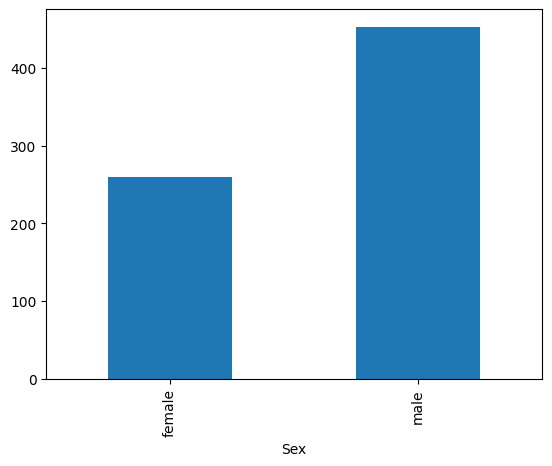

In [ ]:
#bar plot by count
df.groupby('Sex').size().plot(kind='bar')

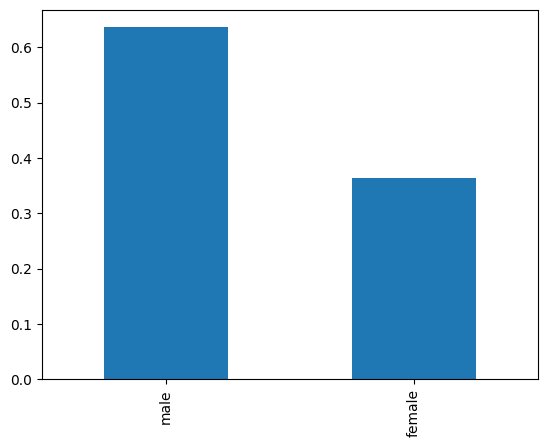

In [ ]:
#bar plot by ratio
df['Sex'].value_counts(normalize=True).plot(kind='bar');

In [ ]:
g= df.groupby('Sex').size()
g

Sex
female    259
male      453
dtype: int64

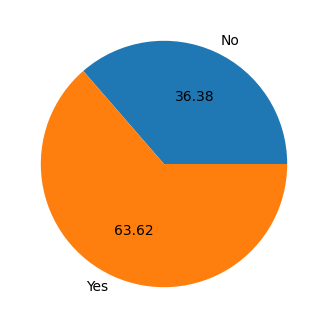

In [ ]:
#What percentage female/male
g.plot(kind='pie', labels=['No','Yes'], 
       autopct='%.2f', fontsize=10, figsize=(4, 4));

### **Pclass**

In [ ]:
# How many passengers in each class? Pie chart
df['Pclass'].nunique()

3

In [ ]:
p = df.groupby('Pclass').size()
p

Pclass
1    184
2    173
3    355
dtype: int64

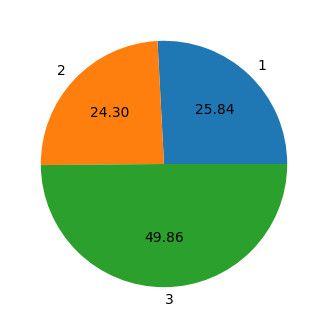

In [ ]:
#pie plot
p.plot(kind='pie', labels=['1','2','3'], 
       autopct='%.2f', fontsize=10, figsize=(4, 4));

<Axes: xlabel='Pclass'>

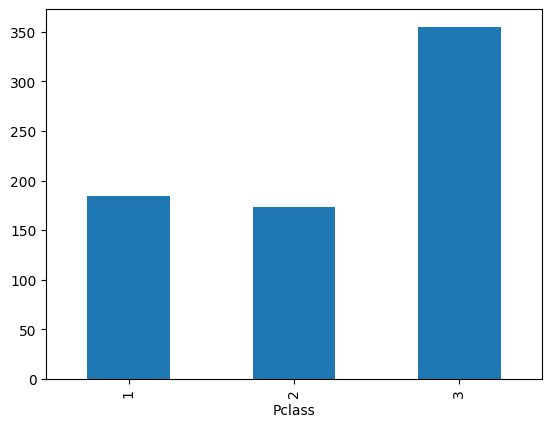

In [ ]:
#bar plot
df.groupby('Pclass').size().plot(kind='bar')

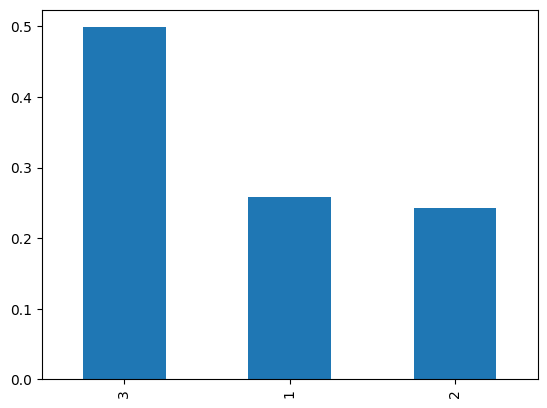

In [ ]:
#percentage bar plot
df['Pclass'].value_counts(normalize=True).plot(kind='bar');

### **Survived**

In [ ]:
# find out how many unique values in each column
df['Survived'].nunique()

2

In [ ]:
#how many survived
s = df.groupby('Survived').size()
s

Survived
0    424
1    288
dtype: int64

288 survived

<Axes: xlabel='Survived'>

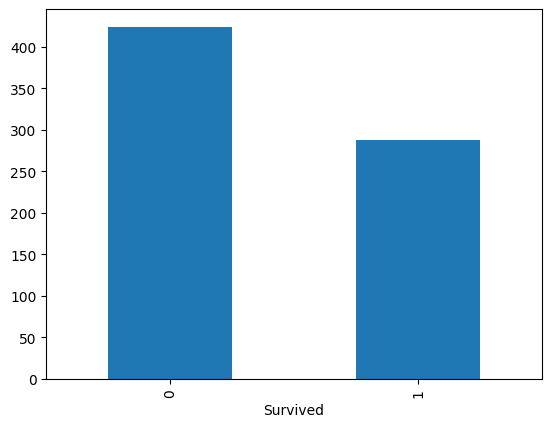

In [ ]:
#bar and pie plot
df.groupby('Survived').size().plot(kind='bar')

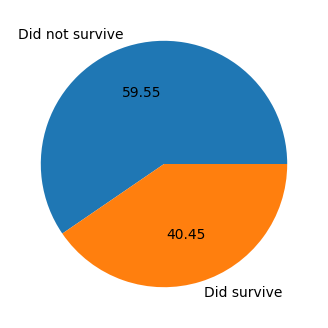

In [ ]:
s.plot(kind='pie', labels=['Did not survive','Did survive'], 
       autopct='%.2f', fontsize=10, figsize=(4, 4));

### **Embarked**

In [ ]:
# How many passengers from each port? Pie chart and bar chart
g = df.groupby('Embarked').size()
g

Embarked
C    130
Q     28
S    554
dtype: int64

In [ ]:
#Report maximum and minimum from which port?
df['Embarked'].min()

'C'

In [ ]:
df["Embarked"].max()

'S'

In [ ]:
#how many survived from each port


<Axes: xlabel='Embarked'>

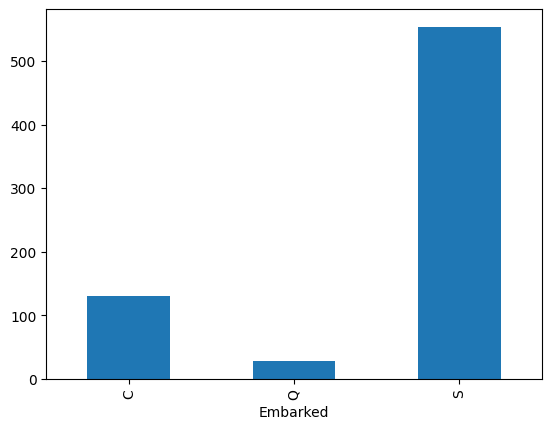

In [ ]:
#bar plot
g.plot(kind= 'bar')

In [ ]:
#display data for 2 siblings
df.loc[df['SibSp'] == 2].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Newcolx
38,0,3,female,18.0,2,0,18.0000,S,2.285830
69,0,3,male,26.0,2,0,8.6625,S,-1.757273
104,0,3,male,37.0,2,0,7.9250,S,1.802926
120,0,2,male,21.0,2,0,73.5000,S,0.002677
147,0,3,female,9.0,2,2,34.3750,S,0.648482


In [ ]:
#separate dataframe 
s = df[df['Survived'] == 1]  # those survived      
ns = df[df['Survived'] == 0]  # those NOT survived
print(len(s), len(ns))

288 424


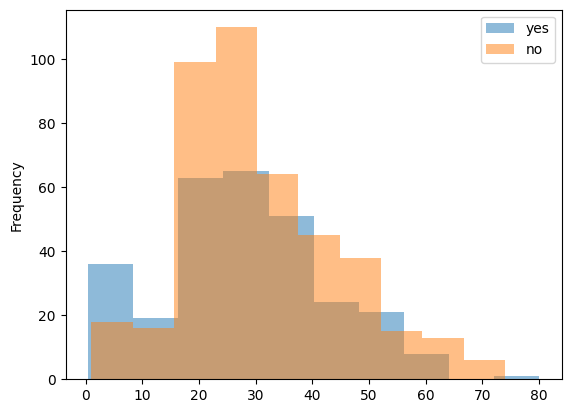

In [ ]:
#do for age and plot bar
s['Age'].plot(kind = 'hist' , alpha = 0.5)
ns['Age'].plot(kind= 'hist' , alpha = 0.5)
plt.legend(['yes', 'no'])

In [ ]:

#alpha = amount of transparency

In [ ]:
g = df.groupby(['Pclass','Sex','Survived']).size().unstack()
g

Survived         0   1
Pclass Sex            
1      female    3  80
       male     61  40
2      female    6  68
       male     84  15
3      female   55  47
       male    215  38

<Axes: xlabel='Pclass,Sex'>

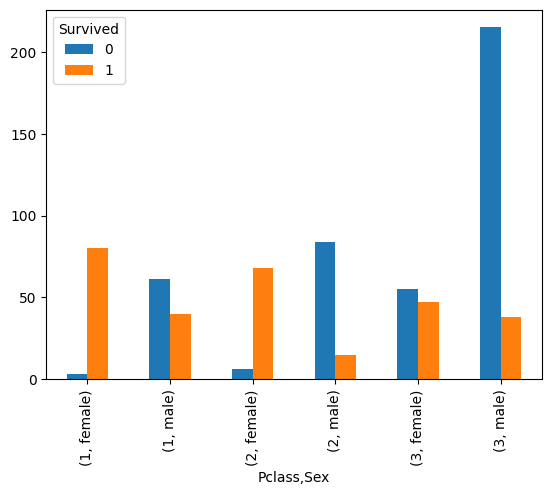

In [ ]:
#bar plot 
g.plot(kind = 'bar')

In [ ]:
# AND condition 
#gender to be female, pclass to be 1, and how many of them survived
len(df[(df['Sex'] == 'female') & (df['Pclass'] == 1) & (df['Survived'] == 1)])

80

In [ ]:
# OR condition
# number of people that have 4 or 5 siblings
len(df[(df['SibSp']==4) | (df['SibSp']==5)])

23

In [ ]:
df['SibSp'].min()

0

In [ ]:
df['SibSp'].max()  

5

In [ ]:
from scipy.stats import norm

In [ ]:
len(df)

712

In [ ]:
x = np.random.randn(712)


In [ ]:
y = np.random.randn(712)

In [ ]:
df['Newcolx'] = x
df.head()

<ipython-input-72-7cdadcf1a46d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Newcolx'] = x


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Newcolx
0,0,3,male,22.0,1,0,7.2500,S,-0.659429
1,1,1,female,38.0,1,0,71.2833,C,-0.580910
2,1,3,female,26.0,0,0,7.9250,S,0.040462
3,1,1,female,35.0,1,0,53.1000,S,-0.062046
4,0,3,male,35.0,0,0,8.0500,S,-0.038835


In [ ]:
df['Newcoly'] = y
df.head()

<ipython-input-73-08b14c2c5e8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Newcoly'] = y


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Newcolx,Newcoly
0,0,3,male,22.0,1,0,7.2500,S,-0.659429,-0.151250
1,1,1,female,38.0,1,0,71.2833,C,-0.580910,-1.018768
2,1,3,female,26.0,0,0,7.9250,S,0.040462,1.046554
3,1,1,female,35.0,1,0,53.1000,S,-0.062046,0.129013
4,0,3,male,35.0,0,0,8.0500,S,-0.038835,-0.928400


In [ ]:
%pip install pingouin
import pingouin as pg


Text(0.5, 1.0, 'OUR DATA')

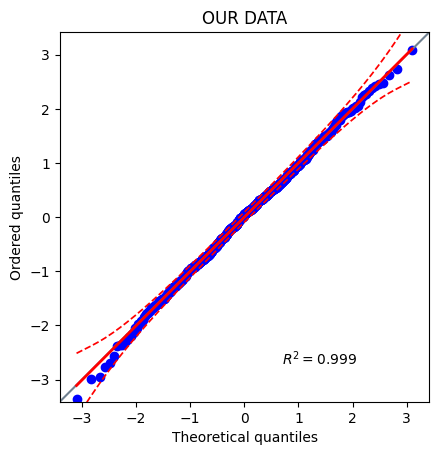

In [ ]:
plt.show()            
pg.qqplot(df['Newcolx']).set_title('OUR DATA')

In [ ]:
#ask for t test , 1 sample , 2sample 

In [ ]:
import scipy as scipy
from scipy import stats

In [ ]:
print(stats.normaltest(df['Age']))